classification

Main steps:

primary data analysis (absence of gaps, presence of categorical features, ...)

feature engineering (build 1-2 new features)

feature scaling

division of the dataset into training, validation and test parts

training of the base model with default hyperparameters

selection of hyperparameters

evaluation of results (metrics calculation, curve plotting)

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import objects as so

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.compose import make_column_transformer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import TargetEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [3]:
scaler = StandardScaler()

In [4]:
# create list with name of columns
columns_names = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight",
                  "Viscera weight", "Shell weight", "Rings"]

In [5]:
# as table was withou column names i'm load data and define to each column it name
data = pd.read_csv("/content/drive/MyDrive/Hillel_ML_Course/6/HW/abalone.data",
                                                         names=columns_names)

**what data in columns:**

Name		Data Type	Meas.	Description
	----		---------	-----	-----------
Sex		nominal			M, F, and I (infant)

Length		----------  Longest shell measurement

Diameter	----------	mm	perpendicular to length

Height		----------	mm	with meat in shell

Whole weight	----------	grams	whole abalone

Shucked weight	----------	grams	weight of meat

Viscera weight	----------	grams	gut weight (after bleeding)

Shell weight	----------	grams	after being dried

Rings		       ----------			+1.5 gives the age in years


In [6]:
data.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

In [7]:
#check out data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


as we see 1 column has categorical data

In [8]:
#check for nan values in column
data["Sex"].isna().sum()

0

#Exploatory data analysis

In [9]:
#and more values
data.describe()

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.234000     9.000000  
75%          0.253000      0.329000    11.000000  
max          0.760000      1.005000    29.000000

In [10]:
# define column list to plot them

columns_list = data.drop(columns="Sex", axis=0).columns.to_list()

In [11]:
columns_list

['Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Shucked weight',
 'Viscera weight',
 'Shell weight',
 'Rings']

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

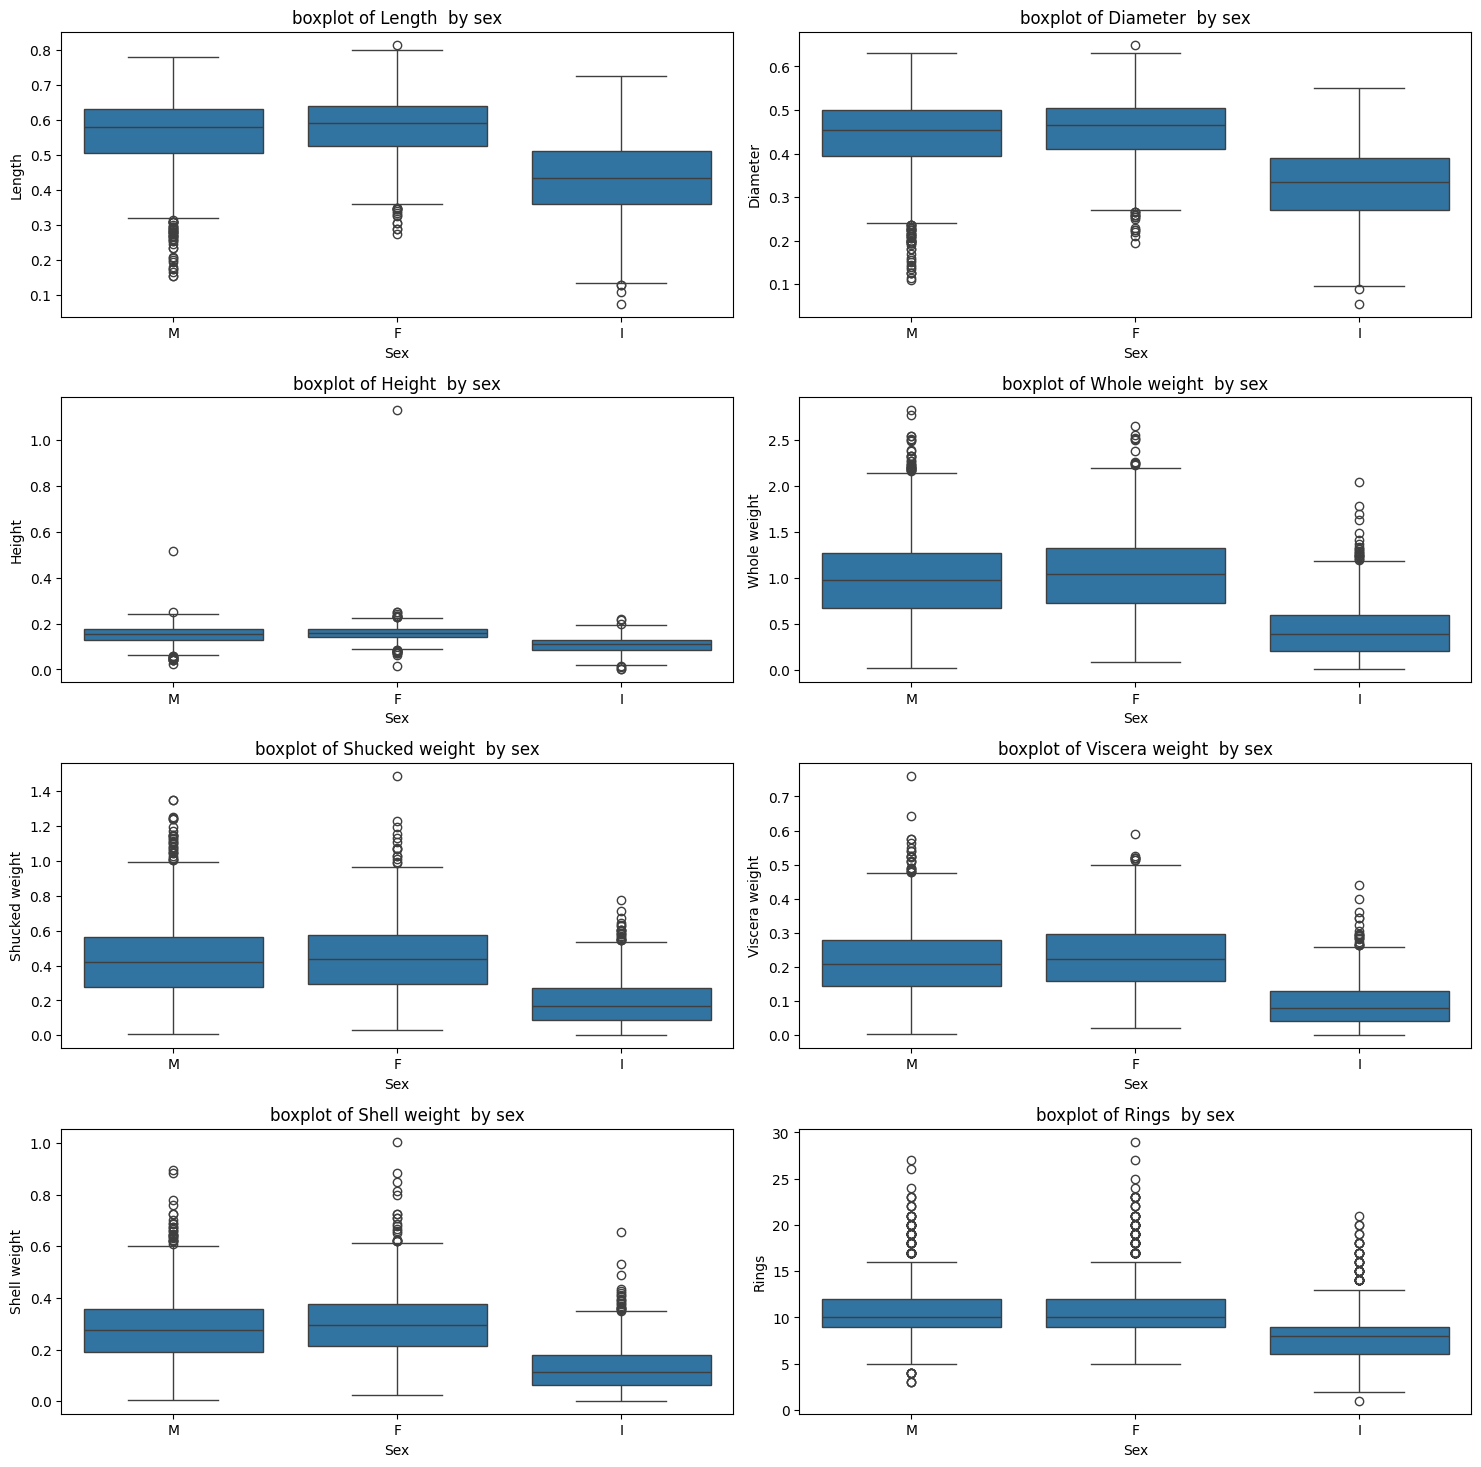

In [12]:
#for me interesting how size depend on sex
# to see it let's plot subplot with all features

# define size of plot
plt.figure(figsize=[15,18])

features = columns_list

n=1

for i in features:
  plt.subplot(5,2,n)
  sns.boxplot(x="Sex", y=i, data=data)
  plt.title("boxplot of {}  by sex".format(i))
  n+=1
plt.tight_layout()
plt.show()

Now i see, that Male and Female approximatly with same values and of course infant are smaller

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

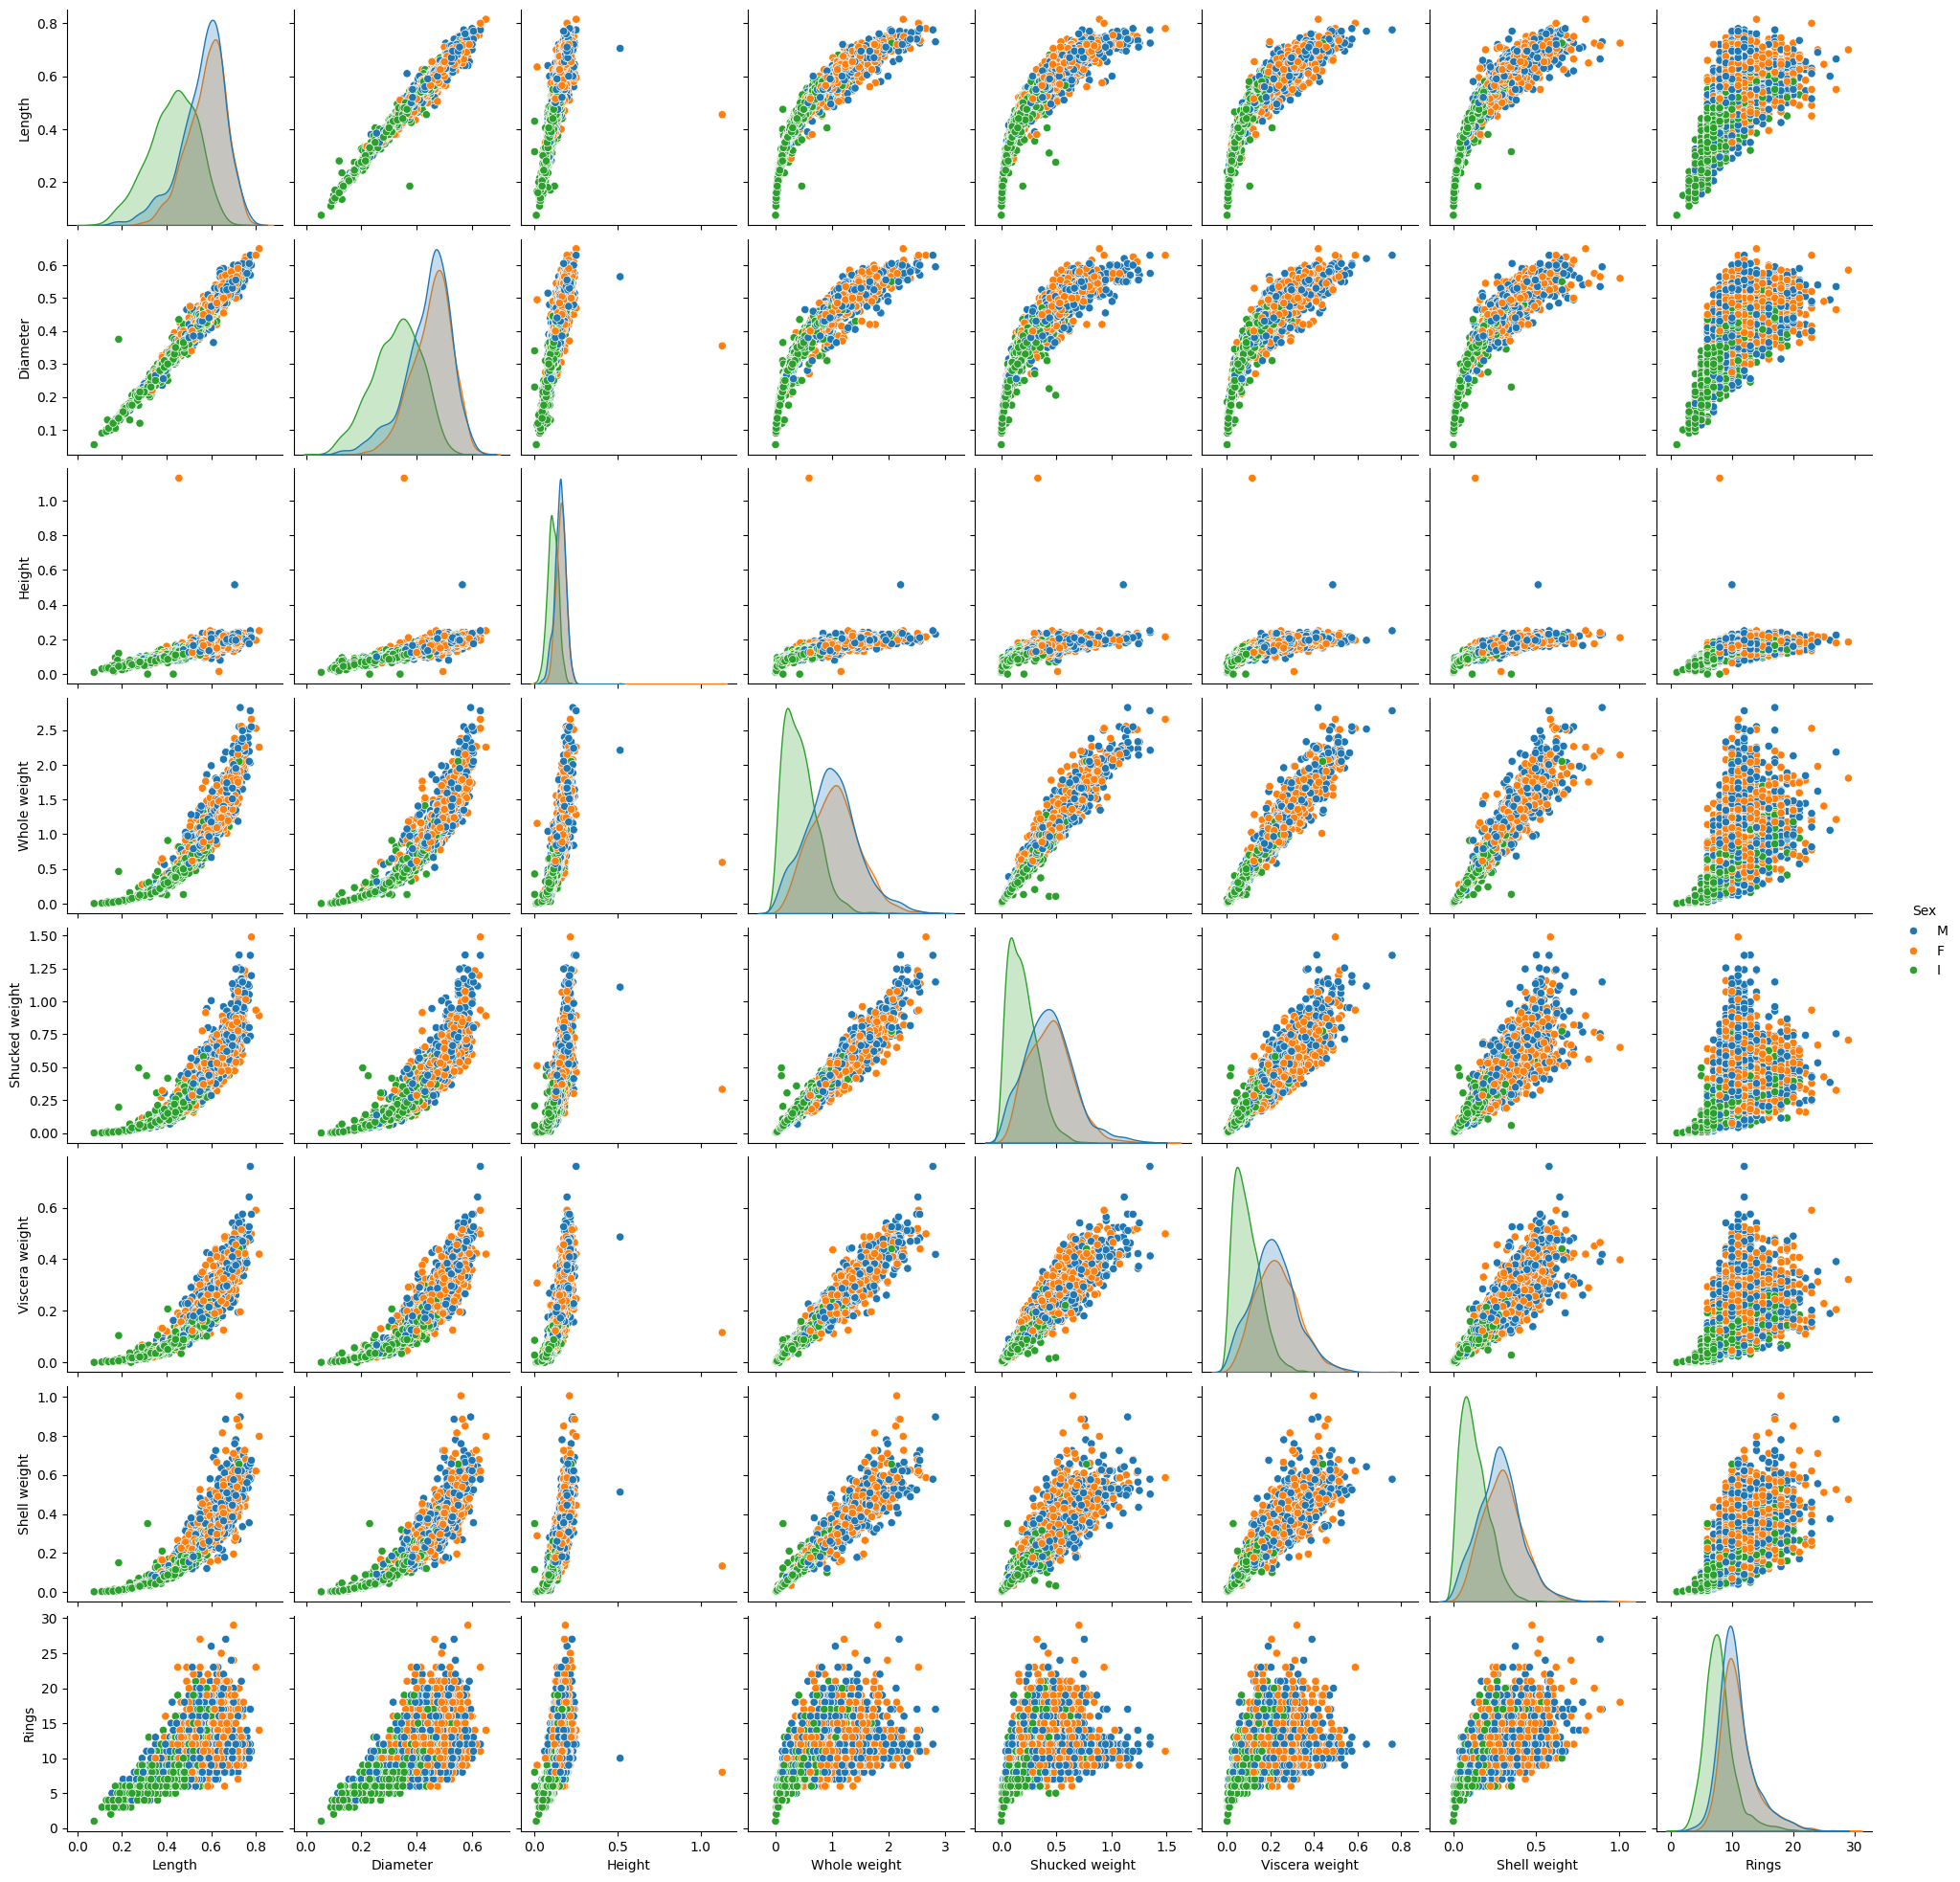

In [13]:
sns.pairplot(data=data, vars=columns_list, hue='Sex')
plt.show()

From this plot i assume that:
few values with unnormal parameters length and height and weght, so it can be not abalone

#Data preprocessing

In [14]:
#rename columns
data_renamed = data.rename(columns={'Whole weight':'Whole_weight',
        'Shucked weight':'Shucked_weight', 'Viscera weight':'Viscera_weight',
                                    'Shell weight':'Shell_weight'})

In [15]:
data_renamed.head(2)

Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   

   Shell_weight  Rings  
0          0.15     15  
1          0.07      7

In [16]:
#define features
X = data_renamed.drop(columns="Rings", axis=0)
#define target
y = data_renamed["Rings"]

In [17]:
#split into train and test sets with train size 80%

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8,
                                                                random_state=42,
                                                                  shuffle=True)

In [18]:
# # join class Male and Female in 1 class
# data_renamed["Sex"] = data_renamed["Sex"].replace({"F":"A", "M":"A"})

In [19]:
# data_renamed.head()

In [20]:
features_1 = data_renamed.drop(columns="Rings", axis=0).columns.to_list()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

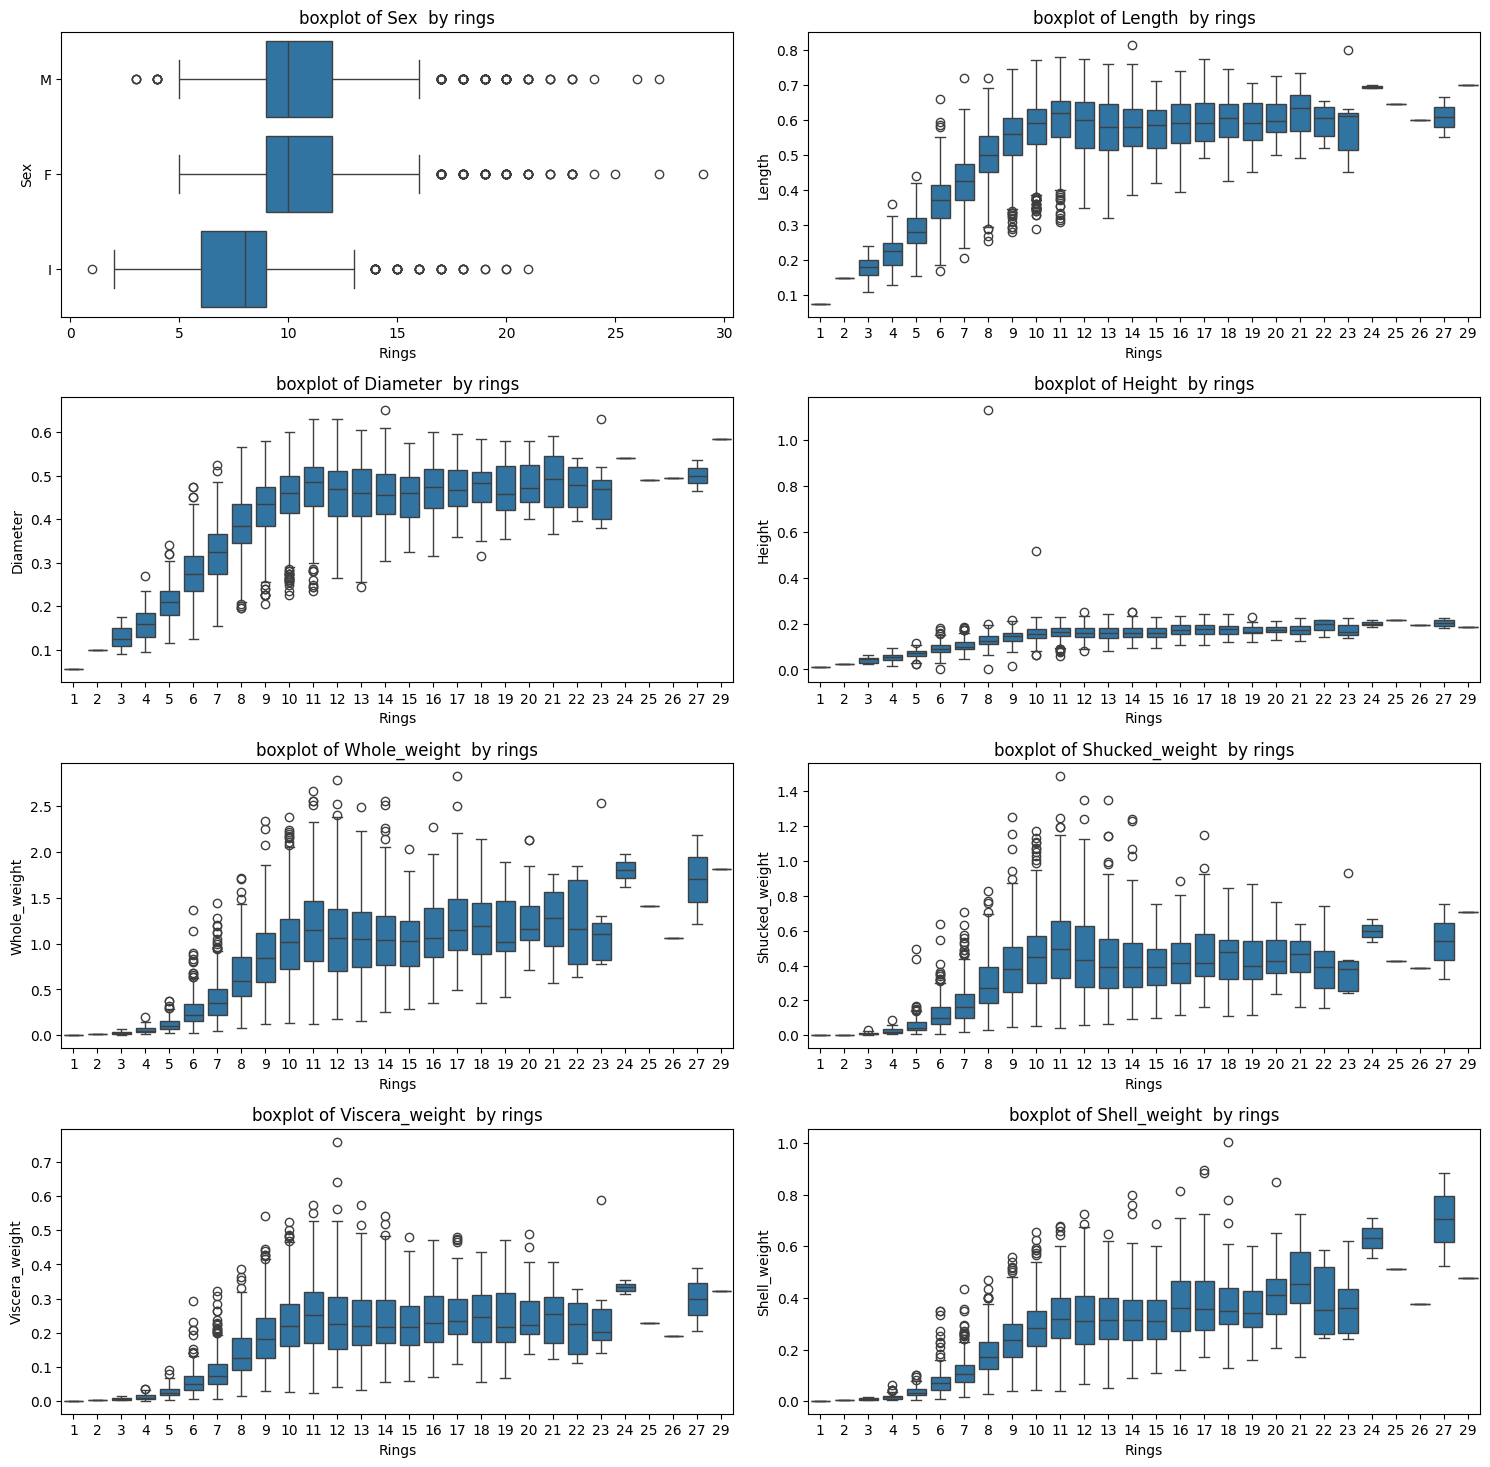

In [21]:
#for me interesting how features depend on target
# to see it let's plot subplot with all features

# define size of plot
plt.figure(figsize=[15,18])

n=1

for i in features_1:
  plt.subplot(5,2,n)
  sns.boxplot(x="Rings", y=i, data=data_renamed)
  plt.title("boxplot of {}  by rings".format(i))
  n+=1
plt.tight_layout()
plt.show()

In [22]:
# valuable = ["Height","Shucked_weight",'Shell_weight','Length', 'Diff_weight',
#                                                                   "Shell_area", "Rings"]

In [23]:
columns_list = data_renamed.drop(columns="Sex", axis=0).columns.to_list()

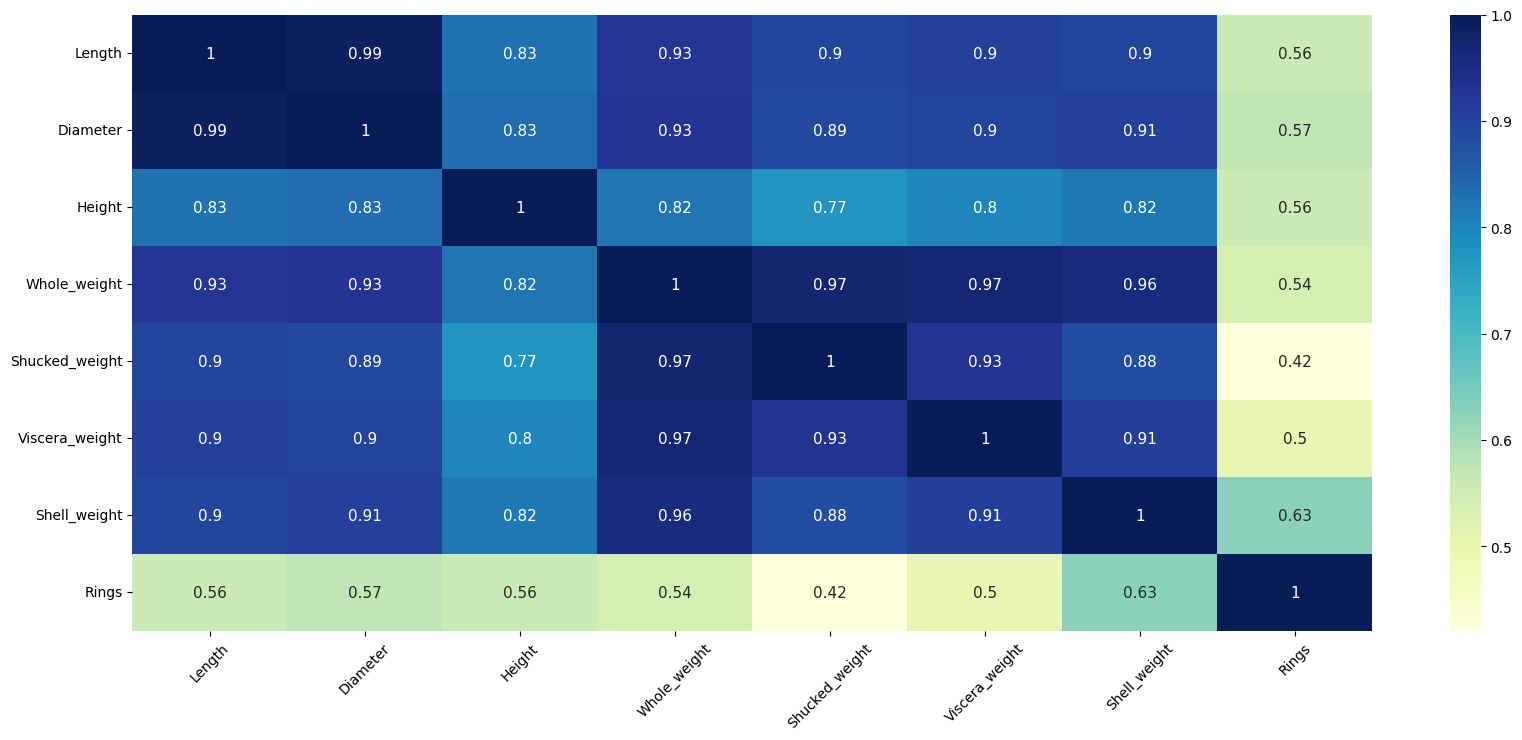

In [24]:
# let's see correlation between features and target
#data_corr = data.corr()

corr_matrix = data_renamed[columns_list].corr()

plt.figure(figsize=(20, 8))

# Create mask
mask = np.triu(data_renamed[columns_list])

#Create heatmap:
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, annot_kws={"fontsize":11},)
plt.xticks(rotation=45)
plt.show()

# Baseline KNN regressor model

In [25]:
col_tfmr = make_column_transformer(make_pipeline(
                    OneHotEncoder(), ["Sex"]
                    ),remainder="passthrough",
                                        force_int_remainder_cols=False)

In [26]:
col_tfmr

ColumnTransformer(force_int_remainder_cols=False, remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(), ['Sex'])])

In [27]:
fin_pipeline = make_pipeline(col_tfmr, StandardScaler(), KNeighborsRegressor())

In [28]:
fin_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(), ['Sex'])])),
                ('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [29]:
cv_score = cross_val_score(fin_pipeline, X_train, y_train, cv=5, scoring="r2")
print(f"the baseline cv 'r2' score is {cv_score.mean()}")

the baseline cv 'r2' score is 0.4828870422300627


In [30]:
# create predict data
knn_base_predict = fin_pipeline.predict(X_test)

#evaluate it
knn_base_test_score = mae(y_test, knn_base_predict)

print("The baseline mean absolute error is:", knn_base_test_score)

The baseline mean absolute error is: 1.6083732057416267


In [31]:
knn_reg_base_table = pd.DataFrame()
knn_reg_base_table["Rings"], knn_reg_base_table["Predicted"] =  y_test, knn_base_predict
knn_reg_base_table

Rings  Predicted
866       9       11.2
1483      8        8.8
599      16       14.8
1702      9       10.4
670      14       11.4
...     ...        ...
3093     11       12.6
1651      8        8.8
2897     10        9.4
3953      8        9.0
1830      7        6.6

[836 rows x 2 columns]

baseline really looks strange, so let's make few feature engeneering

#Feature engeneering

I decided add column with defference of whole weight and sum of other features with weight. This value can show how much eat or water was in shell
And we can find shell area by multiplying leghth and height


In [32]:
# create and define differance feature of whole weight and sum of other weight values

data_renamed["Diff_weight"] = data_renamed["Whole_weight"] - (data_renamed["Shucked_weight"] +
                                 data_renamed["Viscera_weight"] + data_renamed["Shell_weight"])

# create and define shell area feature
data_renamed["Shell_area"] = data_renamed["Length"] * data_renamed["Height"]

In [33]:
data_renamed.head(2)

Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   

   Shell_weight  Rings  Diff_weight  Shell_area  
0          0.15     15       0.0385    0.043225  
1          0.07      7       0.0075    0.031500

#Data cleaning

In [34]:
#Let's see on values with height more then 0.4

data_renamed[data_renamed["Height"]> 0.4]

Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
1417   M   0.705     0.565   0.515         2.210          1.1075   
2051   F   0.455     0.355   1.130         0.594          0.3320   

      Viscera_weight  Shell_weight  Rings  Diff_weight  Shell_area  
1417          0.4865        0.5120     10       0.1040    0.363075  
2051          0.1160        0.1335      8       0.0125    0.514150

In [35]:
#and let's look at values with length < then diametr
data_renamed[data_renamed["Length"]<data_renamed["Diameter"]]

Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
1210   I   0.185     0.375    0.12        0.4645           0.196   

      Viscera_weight  Shell_weight  Rings  Diff_weight  Shell_area  
1210          0.1045          0.15      6        0.014      0.0222

In [36]:
# and now i`m interesting in data with small height and big length

data_renamed[(data_renamed["Length"]>0.2) & (data_renamed["Height"]<0.04)]


Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
1174   F   0.635     0.495   0.015        1.1565          0.5115   
1257   I   0.430     0.340   0.000        0.4280          0.2065   
2172   I   0.215     0.150   0.030        0.0385          0.0115   
3996   I   0.315     0.230   0.000        0.1340          0.0575   

      Viscera_weight  Shell_weight  Rings  Diff_weight  Shell_area  
1174          0.3080        0.2885      9       0.0485    0.009525  
1257          0.0860        0.1150      8       0.0205    0.000000  
2172          0.0050        0.0100      5       0.0120    0.006450  
3996          0.0285        0.3505      6      -0.3025    0.000000

here somthing small but with big weight :)  and other anomalies

In [37]:
#and filter them

data_renamed = data_renamed[data_renamed["Height"]<0.4]
data_renamed = data_renamed[data_renamed["Length"]>data_renamed["Diameter"]]

#create variable to filter data
len2hei = (data_renamed["Length"]>0.2) & (data_renamed["Height"]<0.04)
data_renamed = data_renamed[~len2hei]



In [38]:
data_renamed.shape

(4170, 11)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

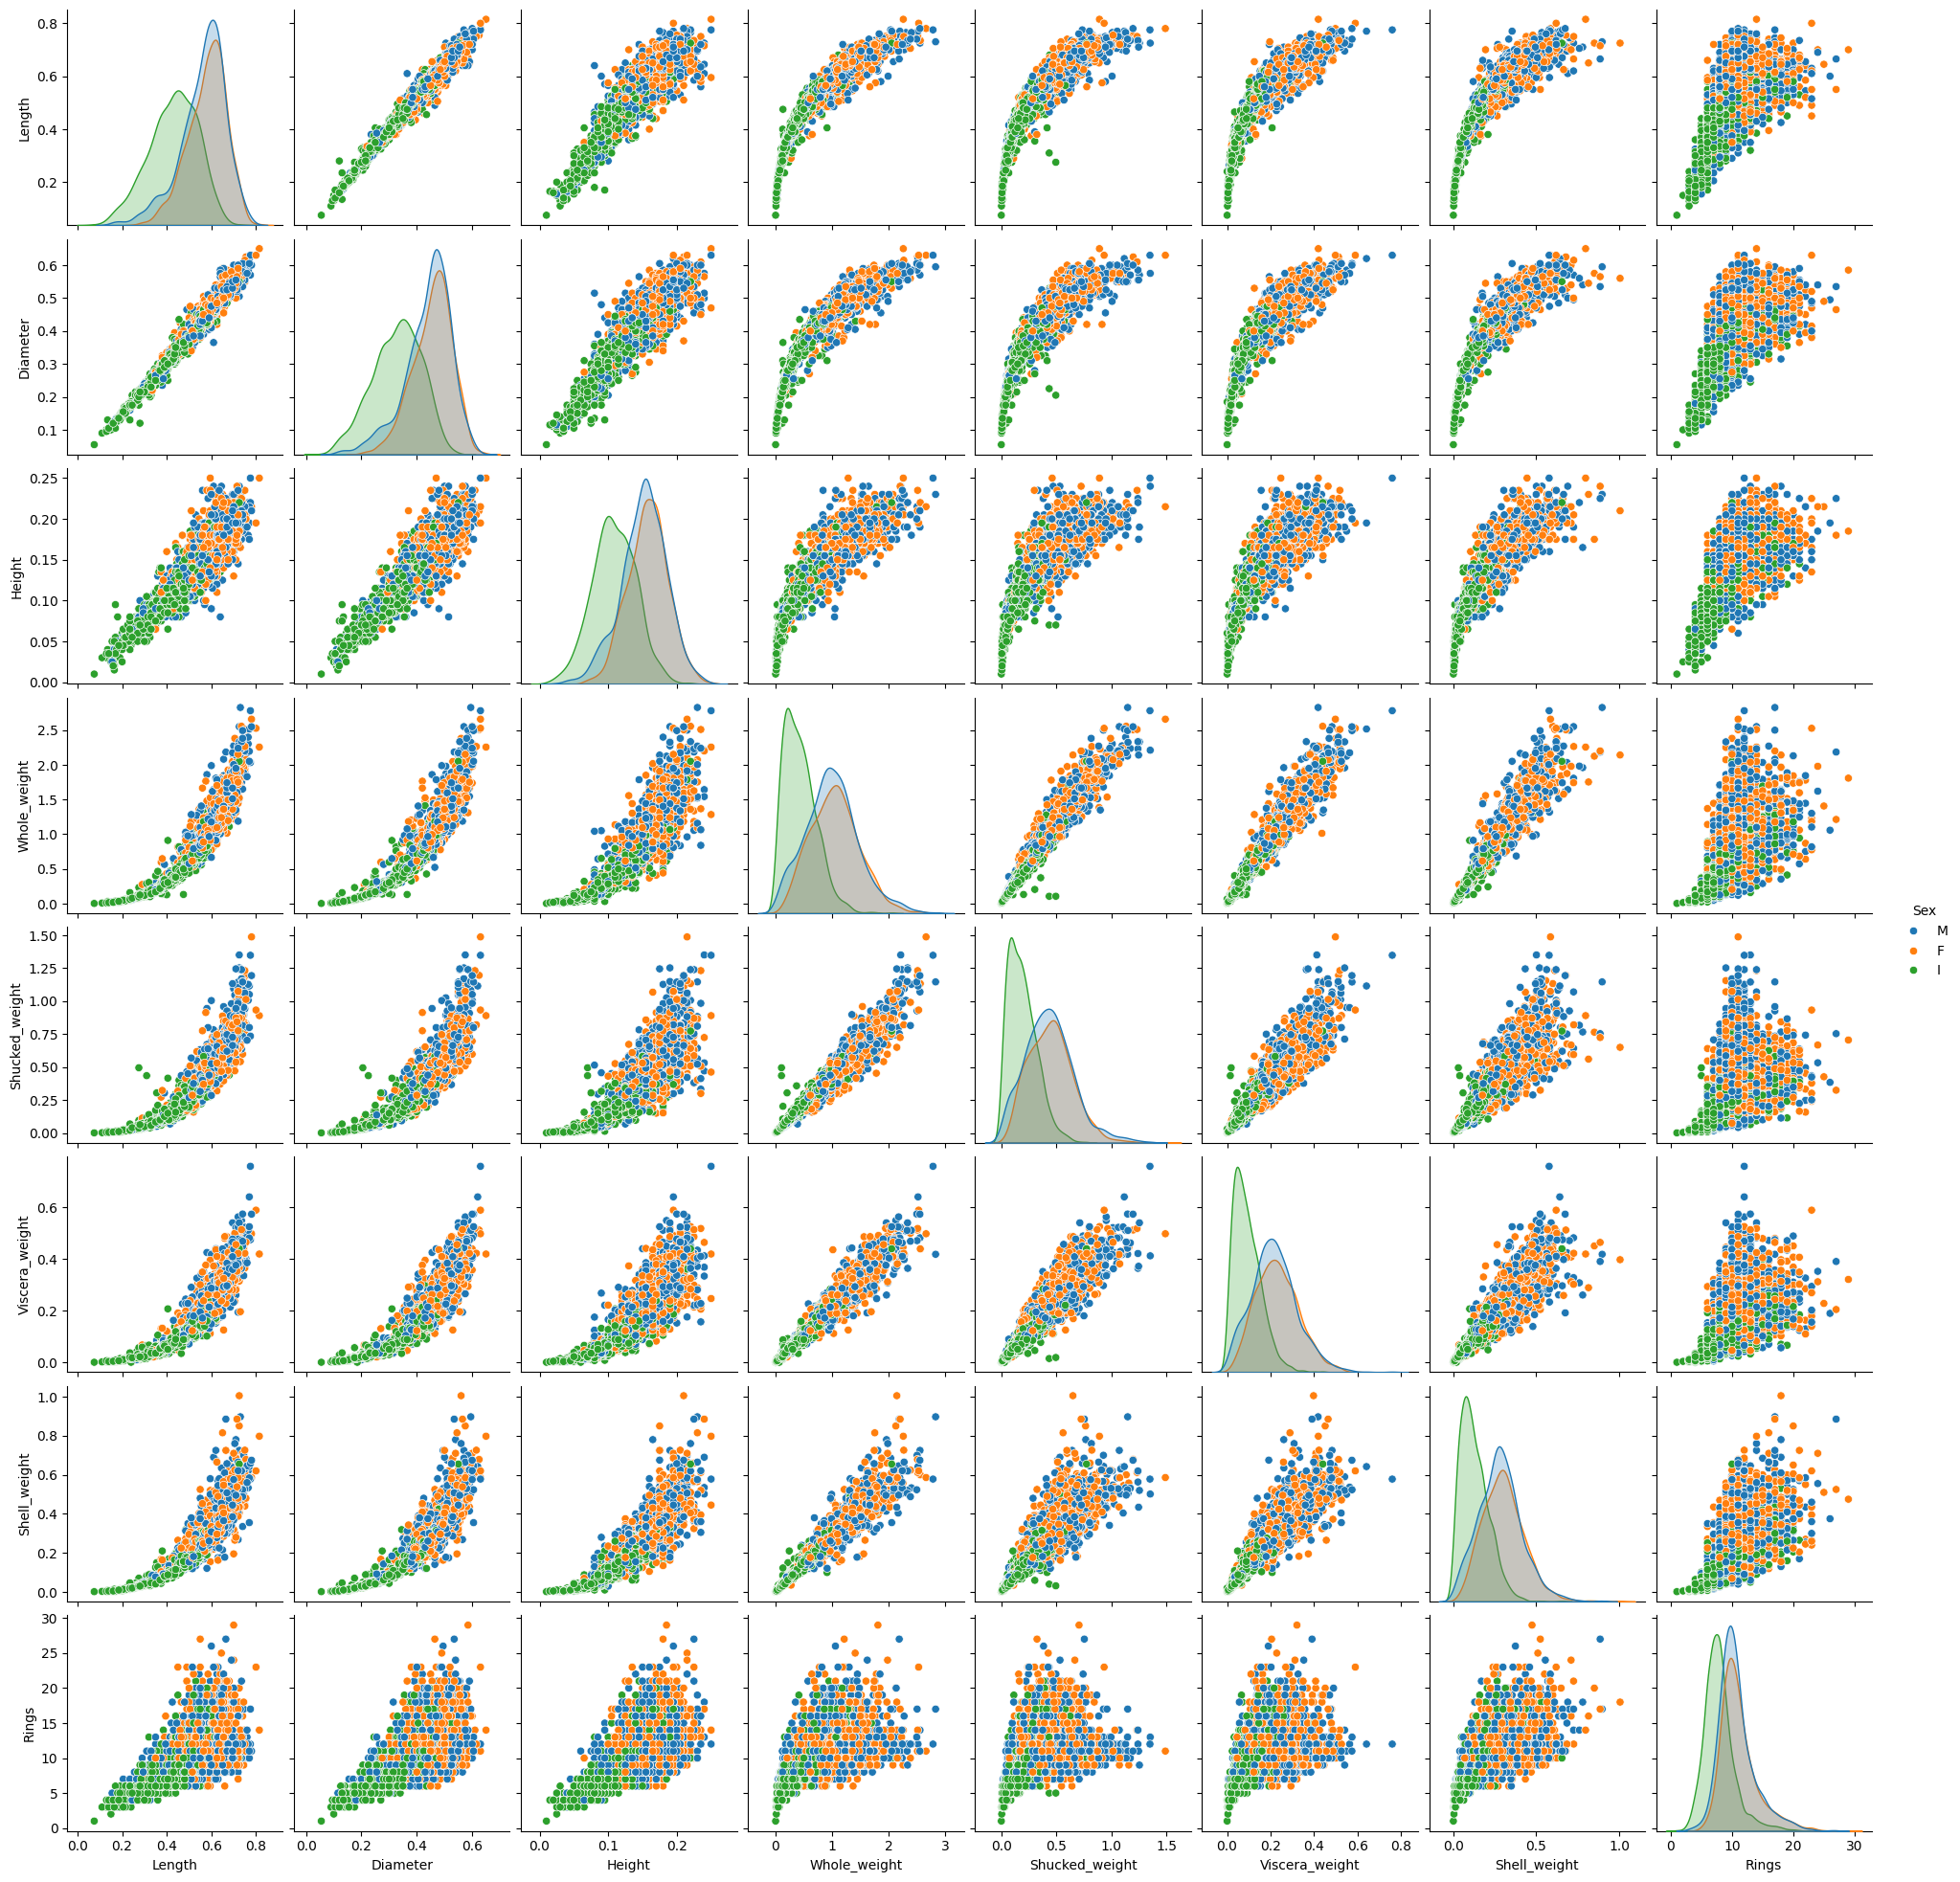

In [39]:
sns.pairplot(data=data_renamed, vars=columns_list, hue='Sex')
plt.show()

# Regression

## Split dataset

In [40]:
# split data into train and test data
train_data, test_data = train_test_split(data_renamed, train_size=0.9, shuffle=True,
                                                           random_state=42)

In [41]:
test_data = test_data.drop(columns=["Diameter","Whole_weight",'Viscera_weight'], axis=0)

In [42]:
X_valid = test_data.drop(columns=["Rings"])
y_valid = test_data["Rings"]

In [43]:
train_data.shape, test_data.shape

((3753, 11), (417, 8))

In [44]:
train_data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings', 'Diff_weight', 'Shell_area'],
      dtype='object')

In [45]:
#After train models step by step i decided to drop next columns:
X = train_data.drop(columns=["Rings","Diameter","Whole_weight",'Viscera_weight'], axis=0)
y = train_data["Rings"]

In [46]:
#X["Length"] = np.sqrt(X["Length"])

In [47]:
# split into train validation data

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True,
                                                    random_state=42)

In [48]:
X_train

Sex  Length  Height  Shucked_weight  Shell_weight  Diff_weight  \
1389   M   0.635   0.160          0.5340        0.3455       0.0350   
3671   I   0.595   0.135          0.4340        0.2870       0.0315   
1112   F   0.520   0.150          0.5230        0.2540       0.0435   
2206   F   0.290   0.075          0.0515        0.0400       0.0250   
955    M   0.495   0.135          0.3035        0.1495       0.0510   
...   ..     ...     ...             ...           ...          ...   
1992   I   0.290   0.070          0.0480        0.0300       0.0130   
1124   F   0.550   0.150          0.3950        0.2230       0.0270   
3387   M   0.545   0.145          0.3035        0.3100       0.0635   
835    I   0.450   0.130          0.2450        0.1405       0.0210   
2485   I   0.355   0.090          0.0770        0.0650       0.0125   

      Shell_area  
1389    0.101600  
3671    0.080325  
1112    0.078000  
2206    0.021750  
955     0.066825  
...          ...  
1992    0.020300  
1124    0.082500  
3387    0.079025  
835     0.058500  
2485    0.031950  

[3002 rows x 7 columns]

In [49]:
X_columns = X.columns.to_list()
X_columns = X_columns[1:]
X_columns

['Length',
 'Height',
 'Shucked_weight',
 'Shell_weight',
 'Diff_weight',
 'Shell_area']

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

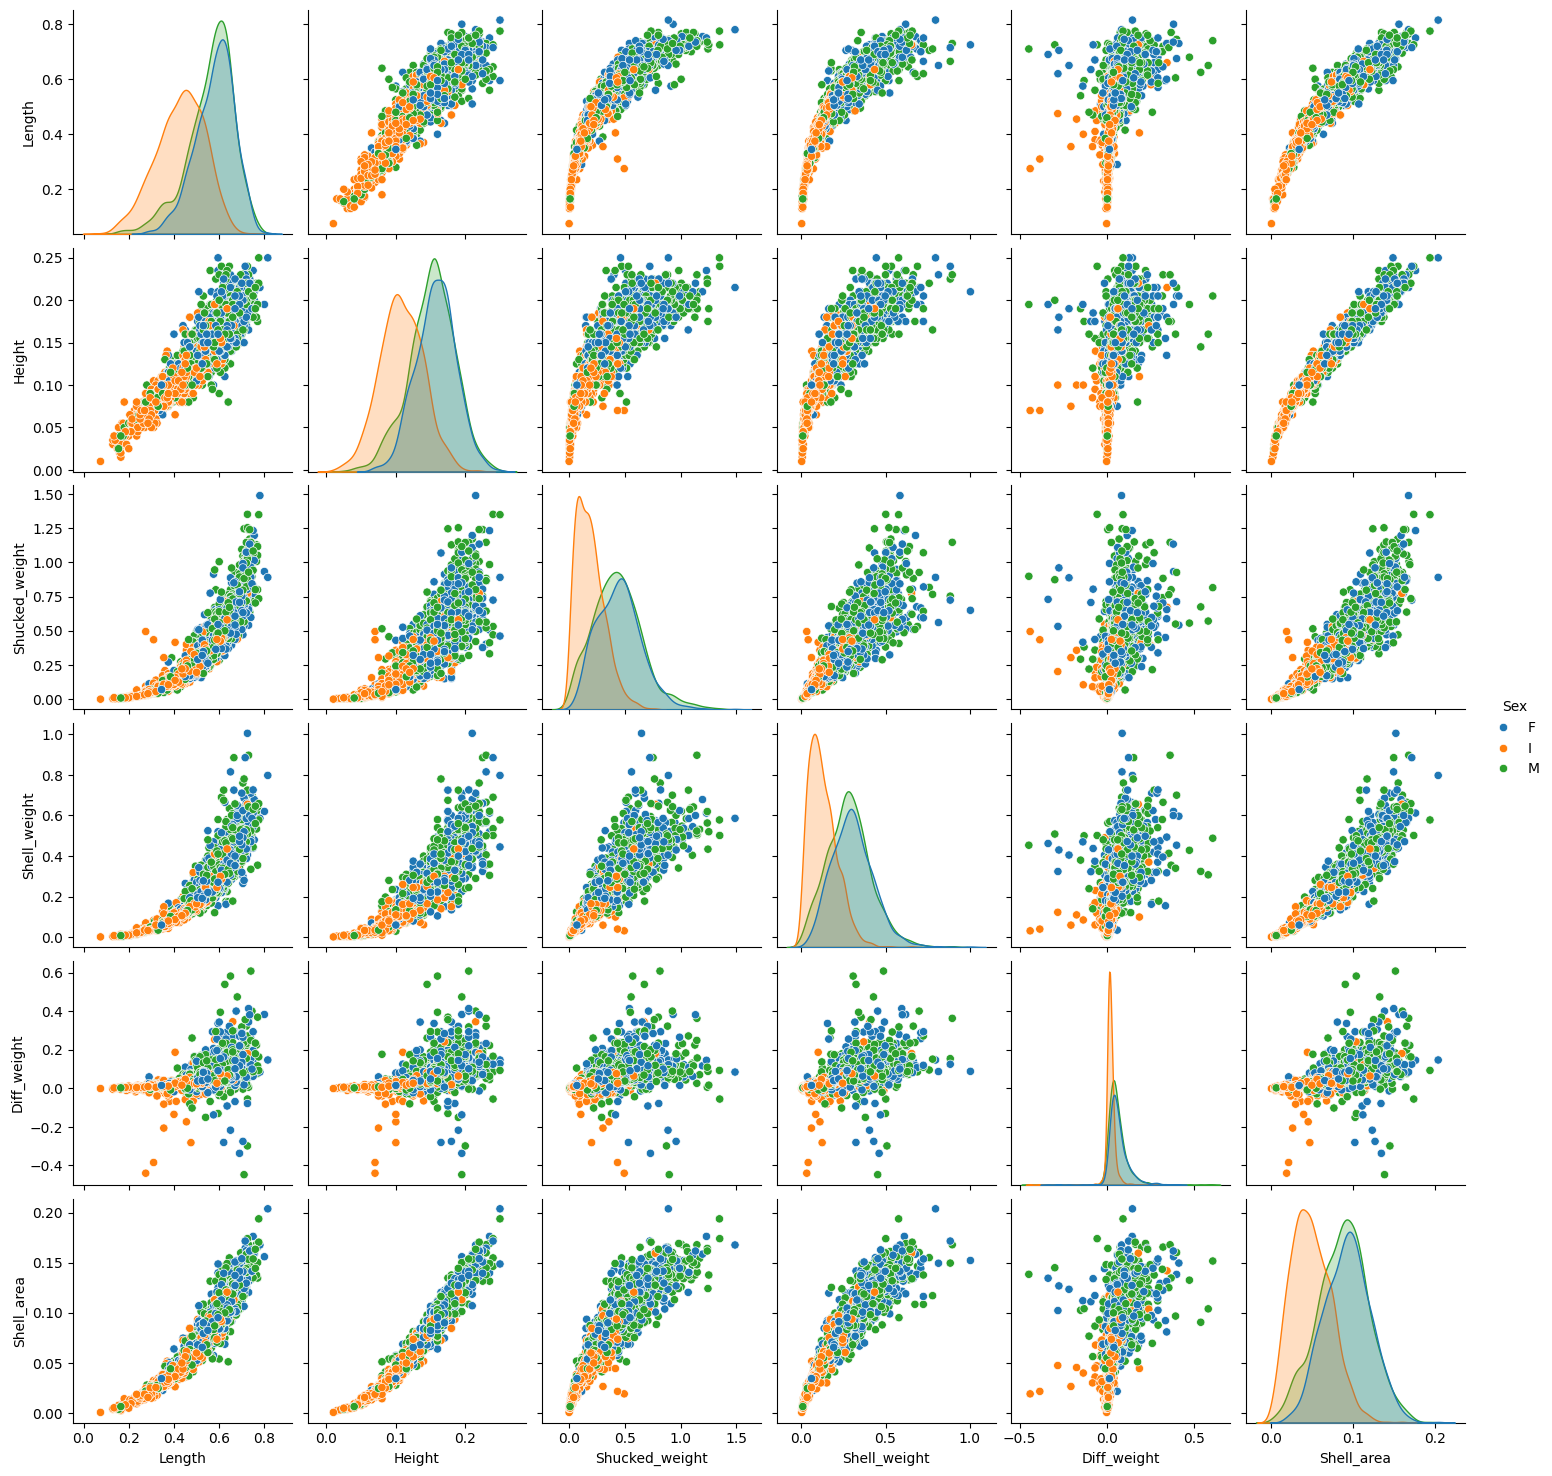

In [50]:
sns.pairplot(data=X, vars=X_columns, hue='Sex')
plt.show()

## KNN regressor

predict rings(age+1) by KNN regressor

In [51]:
# define model
knn_reg = KNeighborsRegressor()

In [52]:
#set grid params
knn_reg_param = {"weights":["uniform", "distance"],
                 "p": [1, 2],
                 "leaf_size": np.arange(5,30,5),
                 "n_neighbors": np.arange(3,8,1)}

In [53]:
knn_reg_col_tfmr = make_column_transformer((OneHotEncoder(sparse_output=False).set_output(transform="pandas"), ["Sex"]),
                                           remainder="passthrough")

In [54]:
knn_reg_col_tfmr

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(sparse_output=False), ['Sex'])])

In [55]:
# make pipeline with grid_search with cv param. Refit=True to return best cv score

knn_regr_pipeline = make_pipeline(knn_reg_col_tfmr, scaler, GridSearchCV(knn_reg,
                                                       knn_reg_param, cv=5,
                                                                    refit=True))

In [56]:
#fit pipeliene

knn_regr_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['Sex'])])),
                ('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
                              param_grid={'leaf_size': array([ 5, 10, 15, 20, 25]),
                                          'n_neighbors': array([3, 4, 5, 6, 7]),
                                          'p': [1, 2],
                                          'weights': ['uniform',
                                                      'distance']}))])

In [57]:
# access to transformer`s pipeline
transformed_data = knn_regr_pipeline.named_steps['columntransformer'].transform(X_train)

# print out transformed data
print(transformed_data)

[[0.       0.       1.       ... 0.3455   0.035    0.1016  ]
 [0.       1.       0.       ... 0.287    0.0315   0.080325]
 [1.       0.       0.       ... 0.254    0.0435   0.078   ]
 ...
 [0.       0.       1.       ... 0.31     0.0635   0.079025]
 [0.       1.       0.       ... 0.1405   0.021    0.0585  ]
 [0.       1.       0.       ... 0.065    0.0125   0.03195 ]]


### evaluating model

In [58]:
knn_reg_cv_score = cross_val_score(knn_regr_pipeline, X_train, y_train, cv=5)

print(f"cross validation score knn regressor  is {knn_reg_cv_score.mean()}")

cross validation score knn regressor  is 0.4928844935607323


In [59]:
#looking for best parameters of gridsearch

grid_search = knn_regr_pipeline.named_steps['gridsearchcv']

print("Best parameters:", grid_search.best_params_)


Best parameters: {'leaf_size': 5, 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


In [60]:
#make prdiction to score model
knn_reg_predict = knn_regr_pipeline.predict(X_valid)

In [61]:
#create data frame with columns of predict values
knn_reg_table = pd.DataFrame({"Predict":knn_reg_predict})

In [62]:
# concat predicted values to table
knn_reg_final_table = pd.concat([test_data.reset_index(), knn_reg_table.reset_index()], axis=1)

#evaluate model with r2 score
knn_reg_r2 = r2(test_data["Rings"], knn_reg_predict)

#evaluate model with mean absolute error score

knn_reg_mae = mae(test_data["Rings"], knn_reg_predict)

print(f"the r2 score on valid data is : {knn_reg_r2}")
print(f"the mean absolute error score on valid data is : {knn_reg_mae}")

the r2 score on valid data is : 0.563424901069386
the mean absolute error score on valid data is : 1.5066803699897224


that's score to different from test data because not such data in valid set

In [63]:
knn_reg_final_table

index Sex  Length  Height  Shucked_weight  Shell_weight  Rings  \
0     1954   F   0.640   0.185          0.6735        0.3255     11   
1     3441   F   0.465   0.115          0.1955        0.1260      7   
2     1930   M   0.620   0.160          0.4400        0.2850     11   
3     1788   F   0.545   0.200          0.5670        0.4030     10   
4     3976   I   0.450   0.135          0.2205        0.1405      7   
..     ...  ..     ...     ...             ...           ...    ...   
412    240   M   0.565   0.160          0.3495        0.2750     17   
413   3641   I   0.465   0.115          0.1515        0.1455      9   
414   3771   I   0.575   0.145          0.3640        0.2600     10   
415   1654   I   0.595   0.150          0.3770        0.2350      8   
416   4039   I   0.560   0.155          0.3685        0.2350     11   

     Diff_weight  Shell_area  index    Predict  
0         0.0740    0.118400      0   9.142857  
1         0.0310    0.053475      1  10.285714  
2         0.0575    0.099200      2   9.428571  
3         0.0700    0.109000      3  12.000000  
4         0.0385    0.060750      4  11.857143  
..           ...         ...    ...        ...  
412       0.0995    0.090400    412  11.857143  
413       0.0170    0.053475    413   8.000000  
414       0.0205    0.083375    414   9.428571  
415       0.0290    0.089250    415   9.571429  
416       0.0295    0.086800    416   9.428571  

[417 rows x 11 columns]

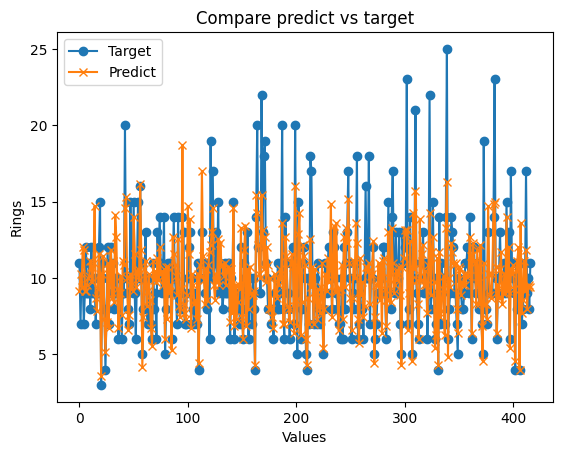

In [64]:
# plot results

plt.plot(knn_reg_final_table["Rings"], label="Target", marker="o")
plt.plot(knn_reg_final_table["Predict"], label="Predict", marker="x")

plt.title("Compare predict vs target")
plt.ylabel("Rings")
plt.xlabel("Values")
plt.legend()

# show plot
plt.show()


###Conclusion:

After feature engeneering and manipulate with hiperparameters i rise up bace cv accuracy for 1%
Model was good trained on abalones that have rings from 1 to 11. to get better perfomance i need to change data in training set


##linear regression

In [65]:
lin_reg = LinearRegression()

In [66]:
col_tfmr = make_column_transformer(make_pipeline(
                   OneHotEncoder(), ["Sex"]),
                                   remainder="passthrough",
                                        force_int_remainder_cols=False)

In [67]:
col_tfmr

ColumnTransformer(force_int_remainder_cols=False, remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(), ['Sex'])])

In [68]:
lin_reg_pipeline = make_pipeline(col_tfmr, scaler, lin_reg)

In [69]:
lin_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(), ['Sex'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

### evaluating model

In [70]:
# cross validation
lin_reg_cv_score = cross_val_score(lin_reg_pipeline, X_train, y_train, cv=5)

print(f"cross validation score linear regressor  is {lin_reg_cv_score.mean()}")

cross validation score linear regressor  is 0.5421871919066483


In [71]:
#make prdiction to score model
lin_reg_predict = lin_reg_pipeline.predict(X_valid)

In [72]:
#create data frame with columns of predict values
lin_reg_table = pd.DataFrame({"Predict":lin_reg_predict})

In [73]:
# concat predicted values to table
lin_reg_final_table = pd.concat([test_data.reset_index(), lin_reg_table.reset_index()], axis=1)

#evaluate model with r2 score
lin_reg_r2 = r2(test_data["Rings"], lin_reg_predict)

#evaluate model with mean absolute error score

lin_reg_mae = mse(test_data["Rings"], lin_reg_predict)

print(f"the r2 score on valid data is : {lin_reg_r2}")
print(f"the mean squared error score on valid data is : {lin_reg_mae}")

the r2 score on valid data is : 0.5984538472936434
the mean squared error score on valid data is : 4.471747493961184


that's score to different from test data because not such data in valid set

In [74]:
lin_reg_final_table

index Sex  Length  Height  Shucked_weight  Shell_weight  Rings  \
0     1954   F   0.640   0.185          0.6735        0.3255     11   
1     3441   F   0.465   0.115          0.1955        0.1260      7   
2     1930   M   0.620   0.160          0.4400        0.2850     11   
3     1788   F   0.545   0.200          0.5670        0.4030     10   
4     3976   I   0.450   0.135          0.2205        0.1405      7   
..     ...  ..     ...     ...             ...           ...    ...   
412    240   M   0.565   0.160          0.3495        0.2750     17   
413   3641   I   0.465   0.115          0.1515        0.1455      9   
414   3771   I   0.575   0.145          0.3640        0.2600     10   
415   1654   I   0.595   0.150          0.3770        0.2350      8   
416   4039   I   0.560   0.155          0.3685        0.2350     11   

     Diff_weight  Shell_area  index    Predict  
0         0.0740    0.118400      0   9.813679  
1         0.0310    0.053475      1   9.062429  
2         0.0575    0.099200      2  10.731629  
3         0.0700    0.109000      3  13.418304  
4         0.0385    0.060750      4   9.103871  
..           ...         ...    ...        ...  
412       0.0995    0.090400    412  12.063245  
413       0.0170    0.053475    413   8.955983  
414       0.0205    0.083375    414   9.774666  
415       0.0290    0.089250    415   9.205735  
416       0.0295    0.086800    416   9.576303  

[417 rows x 11 columns]

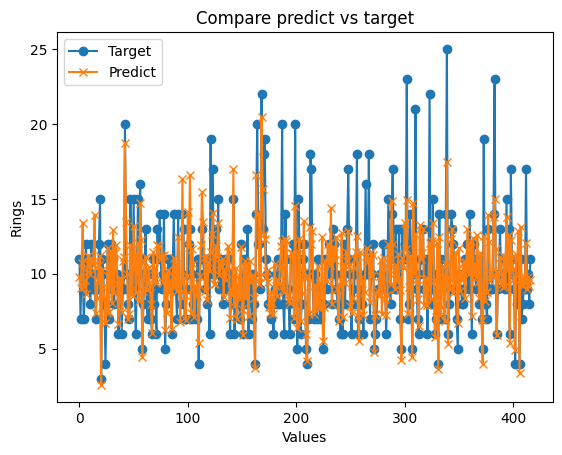

In [75]:
# compare predicted and target values

plt.plot(lin_reg_final_table["Rings"], label="Target", marker="o")
plt.plot(lin_reg_final_table["Predict"], label="Predict", marker="x")

plt.title("Compare predict vs target")
plt.ylabel("Rings")
plt.xlabel("Values")
plt.legend()

# show plot
plt.show()


### Conclusion

the cross validation r2 score for test data is 0.54, on valid data 0.59, mean squared error is 4.471747493961184. that's better KNN but still need to work more with set

# Classification

for classification i take column Sex

## Data preprocessing

In [76]:
# create dataset for classification
clf_data = data_renamed.copy()

In [77]:
clf_data.head()

Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Rings  Diff_weight  Shell_area  
0         0.150     15       0.0385    0.043225  
1         0.070      7       0.0075    0.031500  
2         0.210      9       0.0690    0.071550  
3         0.155     10       0.0315    0.055000  
4         0.055      7       0.0210    0.026400

In [78]:
#change cat data in column Sex by label encoder
le = LabelEncoder()
sex_encoded = le.fit_transform(clf_data["Sex"])

In [79]:
#add encoded column to dataframe
clf_data["Sex_encoded"] = sex_encoded

In [80]:
clf_data

Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Rings  Diff_weight  Shell_area  \
0             0.1010        0.1500     15       0.0385    0.043225   
1             0.0485        0.0700      7       0.0075    0.031500   
2             0.1415        0.2100      9       0.0690    0.071550   
3             0.1140        0.1550     10       0.0315    0.055000   
4             0.0395        0.0550      7       0.0210    0.026400   
...              ...           ...    ...          ...         ...   
4172          0.2390        0.2490     11       0.0290    0.093225   
4173          0.2145        0.2605     10       0.0520    0.079650   
4174          0.2875        0.3080      9       0.0550    0.123000   
4175          0.2610        0.2960     10       0.0065    0.093750   
4176          0.3765        0.4950     12       0.1315    0.138450   

      Sex_encoded  
0               2  
1               2  
2               0  
3               2  
4               1  
...           ...  
4172            0  
4173            2  
4174            2  
4175            0  
4176            2  

[4170 rows x 12 columns]

In [81]:
# drop column "Sex"
clf_data = clf_data.drop(columns="Sex", axis=0)

## Split dataset

In [82]:
# split data into train-test and valid

clf_train, clf_valid = train_test_split(clf_data, train_size=0.9, shuffle=True,
                                                  random_state=42)

In [83]:
clf_train.shape, clf_valid.shape

((3753, 11), (417, 11))

In [84]:
# define features
X = clf_train.drop(columns="Sex_encoded", axis=0)
#define target
y = clf_train["Sex_encoded"]

In [85]:
# split into train - test data set

X_clf_train, X_clf_test, y_clf_train, y_clf_test = \
                        train_test_split(X,y, train_size=0.8, shuffle=True,
                                                              random_state= 42)

In [86]:
X_clf_train.shape, X_clf_test.shape

((3002, 10), (751, 10))

## KNN classifier baseline

In [87]:
knn_clf = KNeighborsClassifier()

In [88]:
# make pipeline for classifier

knn_clf_base_pipeline = make_pipeline(scaler, knn_clf)

# fit pipeline
knn_clf_base_pipeline.fit(X_clf_train, y_clf_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [89]:
# cross validate score
knn_base_clf = cross_val_score(knn_clf_base_pipeline, X_clf_train, y_clf_train,
                                                                           cv=5)
# print out baseline cv score
print(f"cv score of baseline is {knn_base_clf.mean()}")

cv score of baseline is 0.5339700499168053


## KNN classifier with parameters grid

In [90]:
# parameters for gridsearchcv

knn_clf_param = {"n_neighbors" : np.arange(3,8,1),
                 "weights" : ["uniform", "distance"],
                 "leaf_size" : np.arange(10,40, 10),
                 "p": [1,2]}

In [91]:
# make pipelien

knn_clf_pipeline = make_pipeline(scaler, GridSearchCV(knn_clf, knn_clf_param,
                                 cv=5, refit=True))

In [92]:
#fit pipeline

knn_clf_pipeline.fit(X_clf_train, y_clf_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
                              param_grid={'leaf_size': array([10, 20, 30]),
                                          'n_neighbors': array([3, 4, 5, 6, 7]),
                                          'p': [1, 2],
                                          'weights': ['uniform',
                                                      'distance']}))])

In [93]:
#looking for best parameters of gridsearch

knn_clf_grid_search = knn_regr_pipeline.named_steps['gridsearchcv']


In [94]:
# cross validate knn

knn_clf_cross_val = cross_val_score(knn_clf_pipeline, X_clf_train, y_clf_train,
                                                                          cv=5)

#print out cross_validation score

print(f"the cross validation scor of knn clasifier is {knn_clf_cross_val.mean()}")
print("Best parameters:", knn_clf_grid_search.best_params_)

the cross validation scor of knn clasifier is 0.5346439267886856
Best parameters: {'leaf_size': 5, 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


In [96]:
from sklearn.metrics import roc_auc_score

In [111]:
knn_clf_pred = knn_clf_pipeline.predict_proba(X_clf_test)


In [112]:
roc_auc_score(y_clf_test,knn_clf_pred, multi_class="ovr")

0.7215338074431887